<a href="https://colab.research.google.com/github/FabricioCruzDev/AnaliseDeDados/blob/master/Case_2/Vendas_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Vendas Varejo

Uma loja de Varejo deseja criar algumas métricas para acompanhar seus resultados, possuem a base de vendas e base de clientes.

Fazer o tratamento e união das bases para construção dessas métricas:

* Departamentos mais vendidos

* Média de preço com frete por departamento

* Quantidade de vendas por mês

* Média de renda para cada tipo de canal de venda

* Média de idade de clientes por bandeira

**Premissas de negócio:**

- Temos um erro de sistema, para compras sem UF, considere o estado do MS.

- Preço não pode ser maior que o preço com frete.




In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive, files
import os


In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


## Importando arquivo

In [3]:
df_vendas = pd.read_excel('/content/drive/MyDrive/PosGraduacao/CRISP-DM/data/varejo.xlsx')
df_vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


* As informações sobre o dataset me indicaram que há valores nulos nas variáveis Preço e estado.
* Os nomes das colunas estão fora do padrão.

##Normalizando o nome das colunas

In [5]:
columns = df_vendas.columns
columns

Index(['idcompra', 'idcanalvenda', 'bandeira', 'Data', 'Preço',
       'Preço_com_frete', 'Nome_Departamento', 'estado', 'cliente_Log'],
      dtype='object')

In [6]:
columns_new = ['id_compra', 'id_canal_venda', 'bandeira', 'data', 'preco',
       'preco_com_frete', 'nome_departamento', 'estado', 'cliente_log']

for i, c in enumerate(df_vendas.columns):
  df_vendas = df_vendas.rename(columns={c : columns_new[i]})

df_vendas

,id_compra,id_canal_venda,bandeira,data,preco,preco_com_frete,nome_departamento,estado,cliente_log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones e Celulares,RJ,15746
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones e Celulares,AM,443
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones e Celulares,PB,9349
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones e Celulares,PB,10944


## Verificando os dados

#### Olhando para os valores únicos das variáveis categóricas

In [7]:
categorics = ['id_canal_venda', 'bandeira', 'nome_departamento', 'estado']

for c in categorics:
  print(df_vendas.groupby(c).id_compra.nunique())
  print()


id_canal_venda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: id_compra, dtype: int64

bandeira
A    27679
B    38483
Name: id_compra, dtype: int64

nome_departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                  

* APP e aplicativo referenciam o mesmo canal de vendas
* Bandeira A e B ( verificar dicionário )
* Departamento está com espaço (substituir por "_")
* Estado OK

In [8]:
df_vendas['id_canal_venda'] = df_vendas['id_canal_venda'].str.replace('APP', 'Aplicativo')

In [9]:
df_vendas['nome_departamento'] = df_vendas['nome_departamento'].str.replace(' ', '_')

## Tratando dados nulos

In [10]:
df_vendas[df_vendas['estado'].isnull()]

,id_compra,id_canal_venda,bandeira,data,preco,preco_com_frete,nome_departamento,estado,cliente_log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


Atendendo a premissa de negócio vou preencher os dados nulos da variável estado com ("MS")

In [11]:
df_vendas['estado'].fillna('MS', inplace = True) # inplace salva o resultado na variável automáticamente

In [12]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   data               80228 non-null  datetime64[ns]
 4   preco              79926 non-null  float64       
 5   preco_com_frete    80228 non-null  float64       
 6   nome_departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Para o preço, vou adicionar o valor médio.

In [13]:
df_vendas['preco'].fillna(df_vendas['preco'].mean(), inplace= True)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          80228 non-null  int64         
 1   id_canal_venda     80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   data               80228 non-null  datetime64[ns]
 4   preco              80228 non-null  float64       
 5   preco_com_frete    80228 non-null  float64       
 6   nome_departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


## Análise exploratória

In [14]:
df_vendas[['preco', 'preco_com_frete']].describe()

,preco,preco_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


### Há uma premissa de negócio dizendo que não pode existir preço maior do que preço com frete

In [15]:
df_correto = df_vendas.query('preco <= preco_com_frete')
df_correto[['preco', 'preco_com_frete']].describe()

,preco,preco_com_frete
count,79888.000000,79888.000000
mean,905.450941,910.367219
std,1056.303339,1058.507787
min,6.320000,6.320000
25%,144.320000,151.128000
50%,531.240000,535.200000
75%,1199.200000,1219.120000
max,14439.240000,14439.240000


In [16]:
df_correto.query("nome_departamento == 'Esporte_e_Lazer' and estado == 'MG'").describe()

,id_compra,data,preco,preco_com_frete,cliente_log
count,66.000000,66,66.000000,66.000000,66.000000
mean,219457.575758,2023-02-27 05:27:16.363636480,1054.980000,1081.976364,14840.393939
min,720.000000,2023-01-02 00:00:00,33.520000,33.520000,51.000000
25%,114408.750000,2023-02-02 18:00:00,335.200000,351.120000,6727.250000
50%,197565.000000,2023-02-23 12:00:00,1079.200000,1106.896000,15393.500000
75%,338038.750000,2023-03-27 18:00:00,1599.200000,1677.474000,22465.250000
max,497710.000000,2023-04-26 00:00:00,5199.200000,5285.552000,27721.000000
std,144296.123012,NaN,856.108535,868.464027,8534.487336


### Departamentos mais vendidos

In [17]:
df_correto.groupby('nome_departamento').id_compra.nunique().sort_values(ascending=False).reset_index()

,nome_departamento,id_compra
0,Telefones_e_Celulares,14464
1,Eletrodomesticos,10466
2,Eletroportateis,9530
3,TVs_e_Acessorios,5319
4,Informatica,5273
5,Beleza_e_Saude,4605
6,Bebes,4503
7,Moveis,4155
8,Utilidades_Domesticas,3702
9,Acessorios_e_Inovacoes,3535


###Média de preço com frete por Nome de Departamento

In [18]:
df_correto.groupby('nome_departamento')['preco_com_frete'].agg('mean').sort_values(ascending= False).reset_index()

,nome_departamento,preco_com_frete
0,TV_e_Video,9847.264000
1,TVs_e_Acessorios,2058.703545
2,Informatica,2018.255616
3,Linha_Industrial,1668.679535
4,Cine_e_Foto,1461.082182
5,Telefones_e_Celulares,1420.012216
6,Eletrodomesticos,1235.415810
7,Esporte_e_Lazer,1032.471985
8,Tablets,963.603369
9,Instrumentos_Musicais,834.608000


###Quantidade de vendas por mês

In [19]:
df_correto['mes'] = df_correto['data'].dt.month
df_correto

<ipython-input-19-1dbe131b1847>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correto['mes'] = df_correto['data'].dt.month


,id_compra,id_canal_venda,bandeira,data,preco,preco_com_frete,nome_departamento,estado,cliente_log,mes
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742,3
...,...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones_e_Celulares,RJ,15746,4
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones_e_Celulares,AM,443,2
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones_e_Celulares,PB,9349,1
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones_e_Celulares,PB,10944,2


In [20]:
df_correto.groupby('mes').id_compra.nunique().sort_values(ascending= False)

,id_compra
mes,
3,18982
4,18297
1,18159
2,17332


## Analizando e juntando os dados de outra tabela

In [21]:
df_clientes = pd.read_excel('/content/drive/MyDrive/PosGraduacao/CRISP-DM/data/cliente_varejo.xlsx')

In [22]:
df_clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [23]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


* Não há valores nulos
* A variável renda está no formato inteiro enquanto o ideal seria float
* O nome da coluna cliente_log está fora do padrão que estou utilizando, vou alterar para "cliente_log".

In [35]:
df_clientes = df_clientes.astype({'renda': 'float'})
df_clientes.rename(columns={'cliente_Log': 'cliente_log'}, inplace = True)

In [41]:
round(df_clientes[['idade', 'renda']].describe(), 2)

,idade,renda
count,26425.00,26425.00
mean,53.41,8241.47
std,20.70,3899.87
min,18.00,1500.00
25%,35.00,4859.00
50%,53.00,8234.00
75%,71.00,11629.00
max,89.00,15000.00


## Juntando os dois datasets

Assossiando pela coluna cliente_log.

In [36]:
df = df_clientes.merge(df_correto, how = 'right', on = 'cliente_log')
df

,cliente_log,idade,renda,id_compra,id_canal_venda,bandeira,data,preco,preco_com_frete,nome_departamento,estado,mes
0,17590,54,2050.0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,3
1,15478,47,8258.0,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,3
2,2933,39,4671.0,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,1
3,2933,53,11717.0,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,1
4,19790,26,9207.0,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,3
...,...,...,...,...,...,...,...,...,...,...,...,...
155998,10944,48,7438.0,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones_e_Celulares,PB,2
155999,10944,71,11116.0,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones_e_Celulares,PB,2
156000,22242,44,11693.0,723410,Aplicativo,B,2023-01-27,879.200,879.200,Telefones_e_Celulares,PB,1
156001,22242,79,11676.0,723410,Aplicativo,B,2023-01-27,879.200,879.200,Telefones_e_Celulares,PB,1


###Agrupamentos:

### Média de renda para cada tipo de canal de **venda**

In [56]:
agg_canal_renda = round(df.groupby('id_canal_venda')['renda'].agg('mean').sort_values(ascending = False).reset_index(),2)
agg_canal_renda

,id_canal_venda,renda
0,Aplicativo,8239.52
1,Internet,8236.37
2,Mobile,8233.43


### Média de idade de **clientes** por **bandeira**

In [48]:
agg_idade_bandeira = round(df.groupby('bandeira')['idade'].agg('mean').sort_values(ascending=True).reset_index(), 2)
agg_idade_bandeira

,bandeira,idade
0,B,53.39
1,A,53.45


## Visualizações

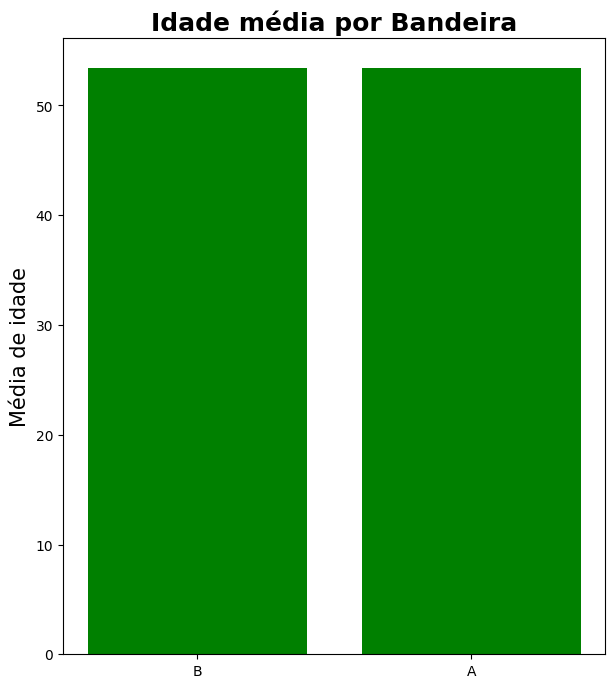

In [57]:
fig = plt.figure(figsize=(7, 8))

plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'], color='green')
plt.ylabel('Média de idade', fontsize = 15)
plt.title('Idade média por Bandeira', loc='center', fontsize=18, fontweight='bold', color='black');


In [74]:
vendas_por_data = df.groupby('data').id_compra.nunique().reset_index()
vendas_por_data.rename(columns={'id_compra':'quantidade_venda'}, inplace=True)
vendas_por_data

,data,quantidade_venda
0,2023-01-02,665
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,669
4,2023-01-06,673
...,...,...
114,2023-04-26,696
115,2023-04-27,711
116,2023-04-28,651
117,2023-04-29,682


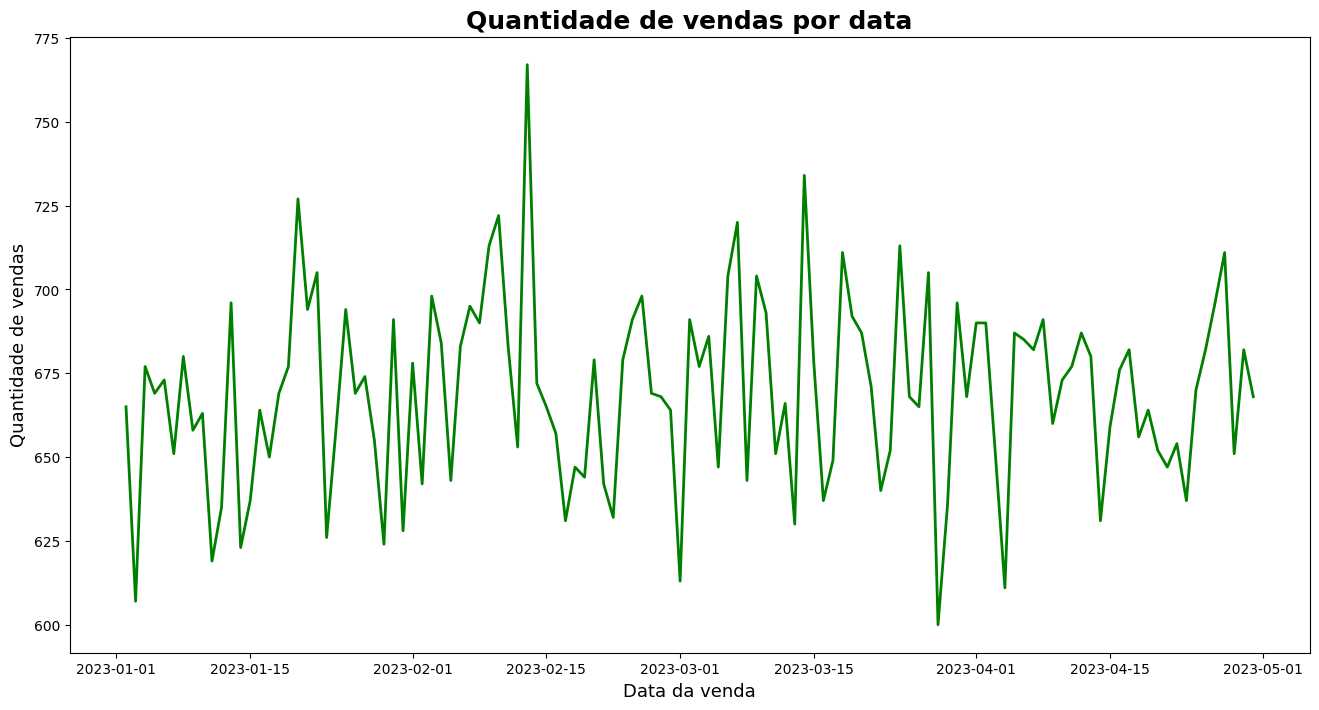

In [78]:
fig = plt.figure(figsize=(16,8))

plt.xlabel('Data da venda', fontsize=13)
plt.ylabel('Quantidade de vendas', fontsize=13)
x = vendas_por_data['data']
y = vendas_por_data['quantidade_venda']
plt.title('Quantidade de vendas por data', fontsize=18, fontweight='bold', color='black')

plt.plot(x, y, color = 'green', linewidth = '2')
plt.show();

In [79]:
agg_dept_preco = round(df.groupby('nome_departamento')['preco_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)


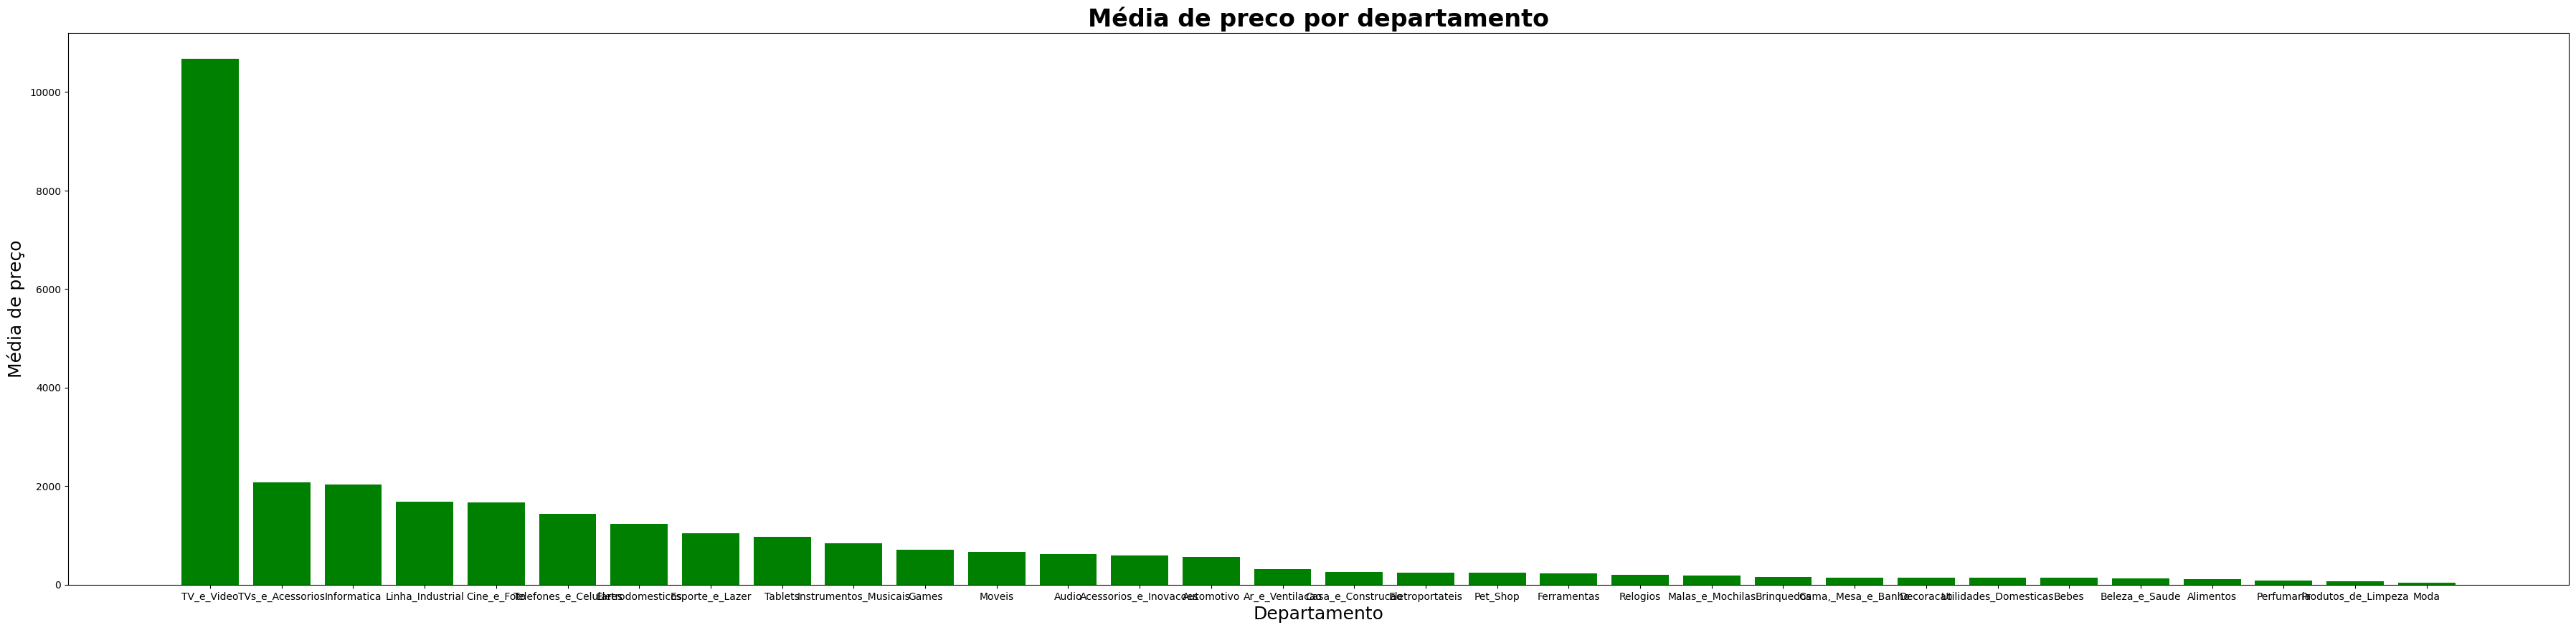

In [85]:
fig = plt.figure(figsize=(45,10))

plt.bar(agg_dept_preco['nome_departamento'], agg_dept_preco['preco_com_frete'], color='green')
plt.title('Média de preco por departamento', fontsize= 24, fontweight = 'bold', color = 'black')
plt.ylabel('Média de preço', fontsize= 18)
plt.xlabel('Departamento', fontsize=18);

##Visualização com o Plotly

In [86]:
#Para fins de didática, vou instalar os pacotes e importá-los. O correto (boa prática) seria no início do código.
%pip install plotly
%pip install cufflinks
%pip install chart-studio

import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import chart_studio.plotly as py

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.0 MB/s eta 0:00:00


In [90]:
px.bar(agg_idade_bandeira, x='bandeira', y='idade')

In [95]:
px.line(vendas_por_data, x='data', y='quantidade_venda')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [99]:
px.bar(agg_dept_preco, x='nome_departamento', y='preco_com_frete')